# Testing whether what's being measured varies by site type

In [1]:
%matplotlib inline

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import scipy.stats as stats
import seaborn as sns

from datetime import date, timedelta
from sklearn.decomposition import PCA

pd.options.display.max_columns = None

In [2]:
data = pd.read_csv('../data/water/CA-results-join.csv.bz2', 
                   low_memory=False, 
                   usecols=['MonitoringLocationIdentifier', 'MonitoringLocationTypeName',
                            'CountyName', 'ActivityMediaSubdivisionName', 'Measure', 
                            'MeasureGroup', 'ActivityStartDate'])
data.MeasureGroup = data.MeasureGroup.str.strip()
xtab = pd.crosstab(data.MonitoringLocationTypeName, data.MeasureGroup)

# ordering xtabs by frequencies
xtab = xtab[data.MeasureGroup.value_counts().index]
xtab = xtab.reindex(data.MonitoringLocationTypeName.value_counts().index)

# All-Time water measurement analysis (going back ~100y)

### Distribution of location types

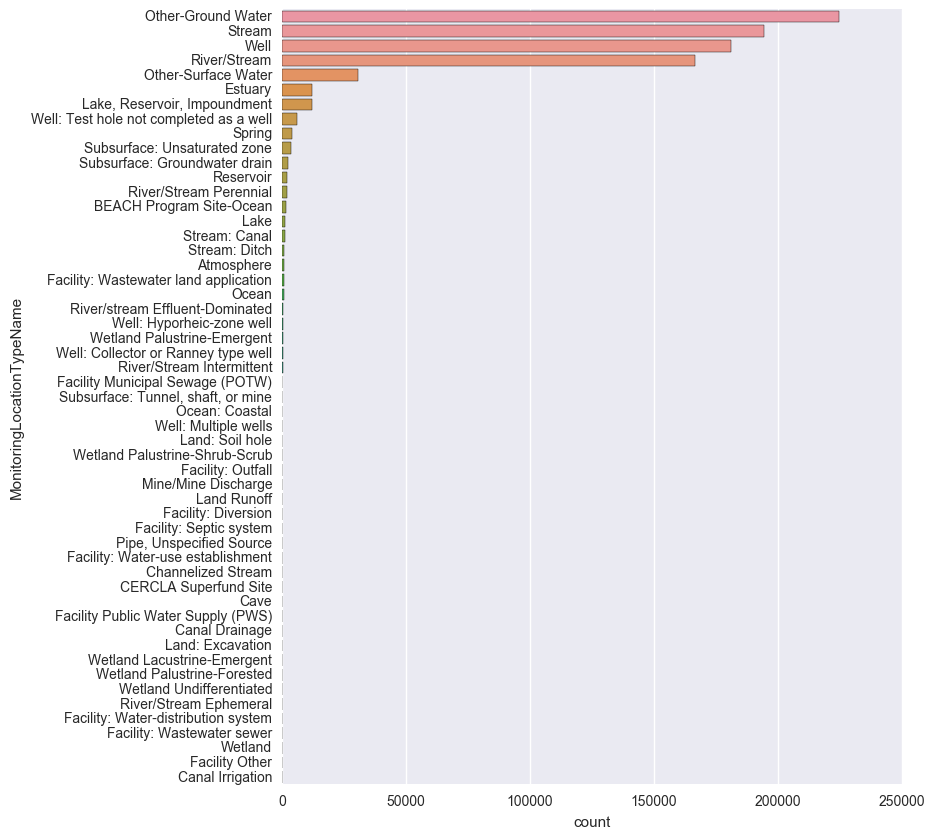

In [3]:
plt.figure(figsize=[8,10])
cp = sns.countplot(y=data.MonitoringLocationTypeName,
                   order=data.MonitoringLocationTypeName.value_counts().index)

### Distribution of pollution types

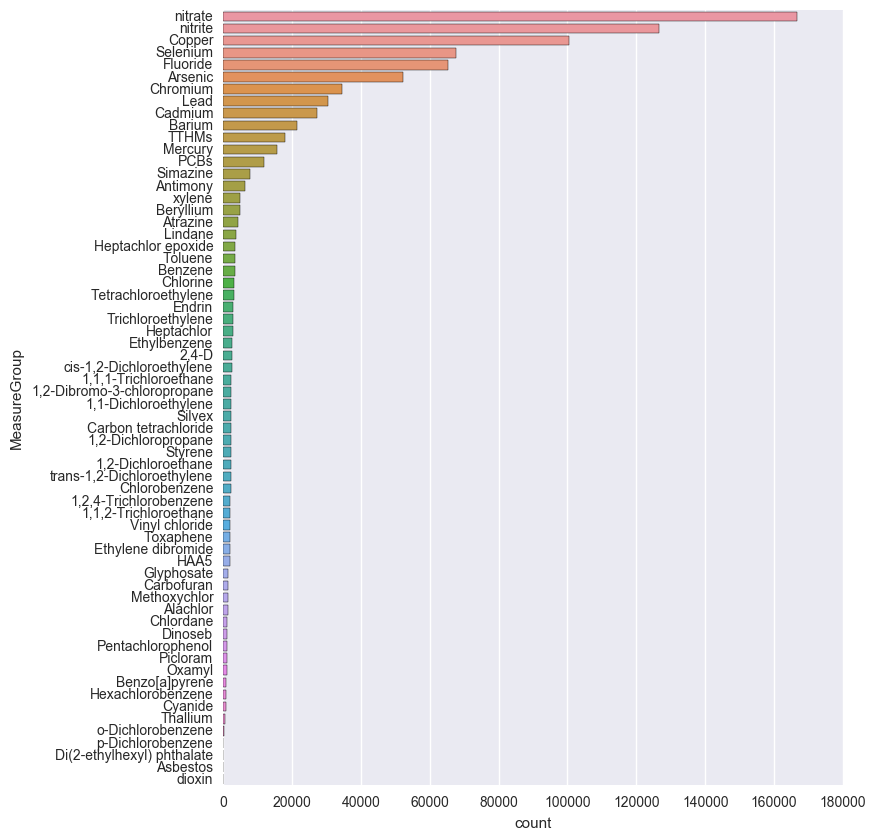

In [4]:
plt.figure(figsize=[8,10])
cp = sns.countplot(y=data.MeasureGroup,
                  order=data.MeasureGroup.value_counts().index)

## Overall heatmap (all time)

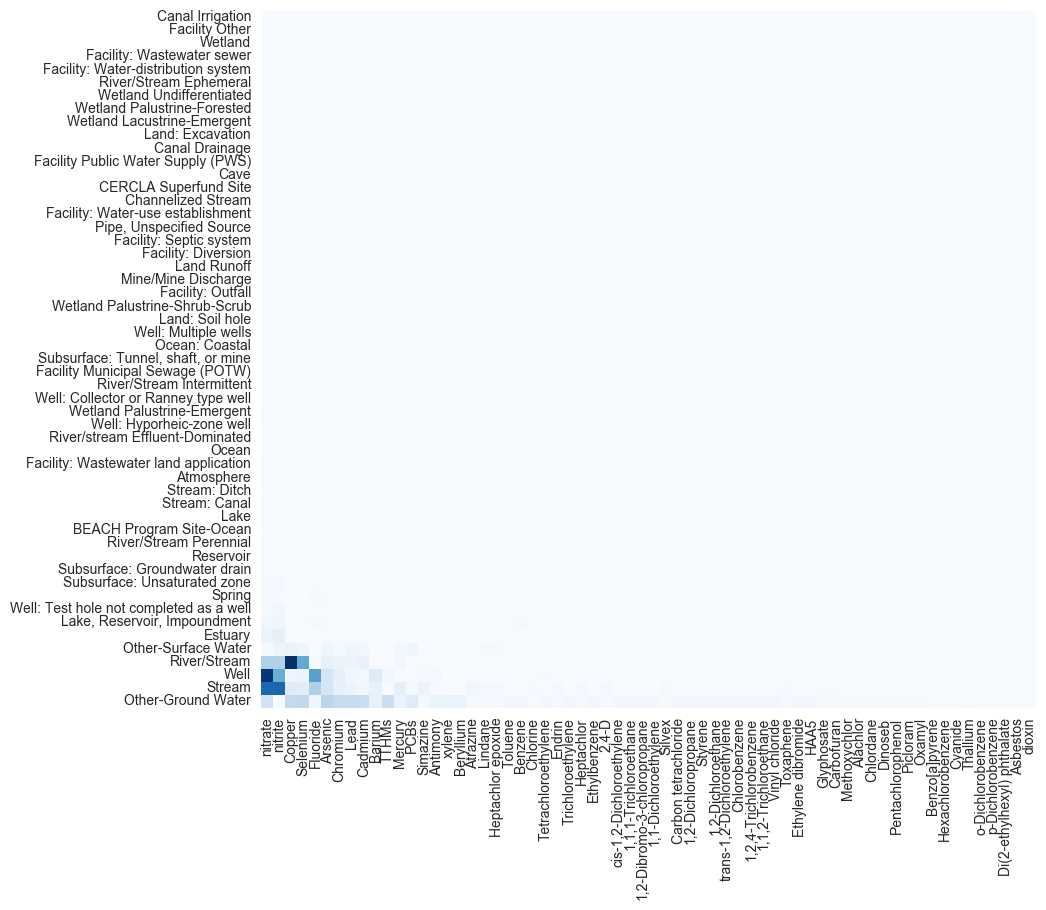

In [5]:
plt.figure(figsize=(10,9))
plt.pcolor(xtab, cmap='Blues')
plt.grid(b=True)
plt.ylim([0, len(xtab.index)])
plt.xlim([0, len(xtab.columns)])
yticks = plt.yticks(np.arange(0.5, len(xtab.index), 1), xtab.index)
xticks = plt.xticks(np.arange(0.5, len(xtab.columns), 1), xtab.columns, rotation='vertical')

## Percentage of measurements by location type (all time)
Within each row, the darkness of the squares indicate the relative proportion of measurements taken at that site.

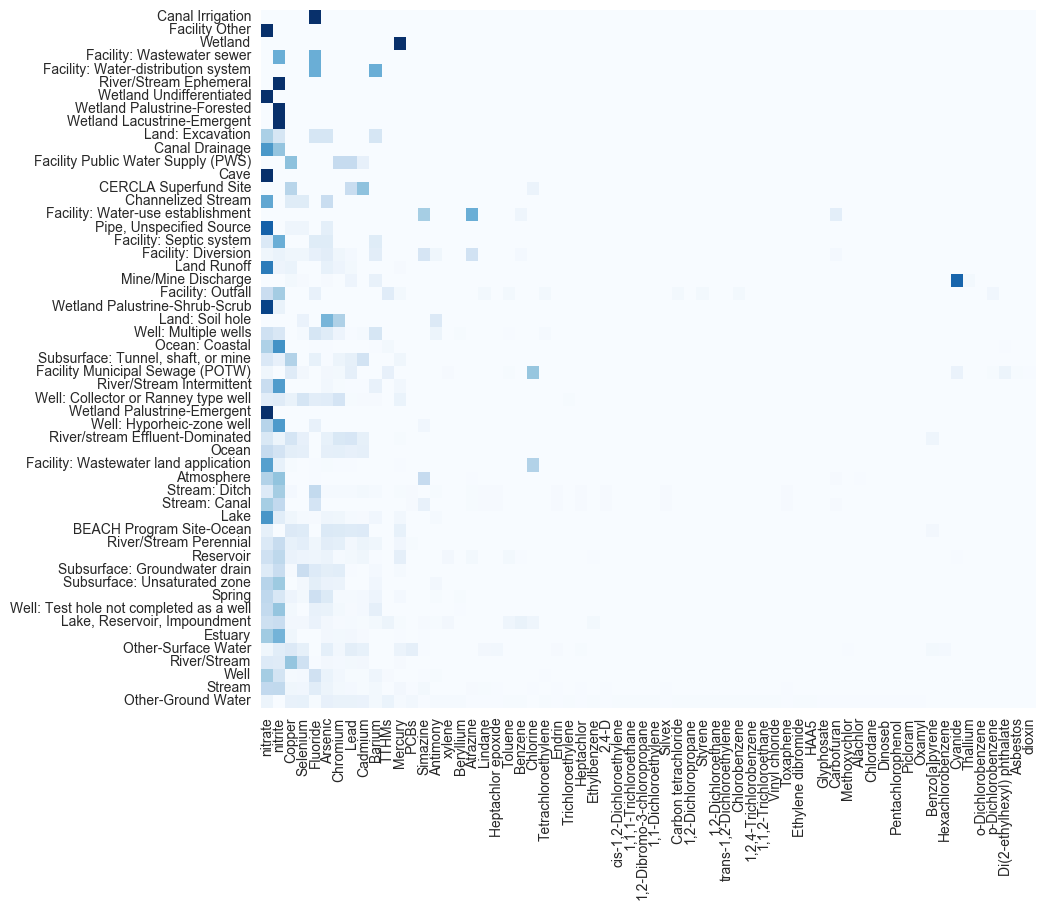

In [6]:
sums = xtab.sum(axis=1)
xtab_pct = xtab.div(sums, axis=0)

plt.figure(figsize=(10,9))
plt.pcolor(xtab_pct, cmap='Blues')
plt.grid(b=True)
plt.ylim([0, len(xtab_pct.index)])
plt.xlim([0, len(xtab_pct.columns)])
yticks = plt.yticks(np.arange(0.5, len(xtab_pct.index), 1), xtab_pct.index)
xticks = plt.xticks(np.arange(0.5, len(xtab_pct.columns), 1), xtab_pct.columns, rotation='vertical')

## Percentage of locations by measurement type (all time)
Within each row, the darkness of the squares indicate the relative proportion of measurements taken at that site.

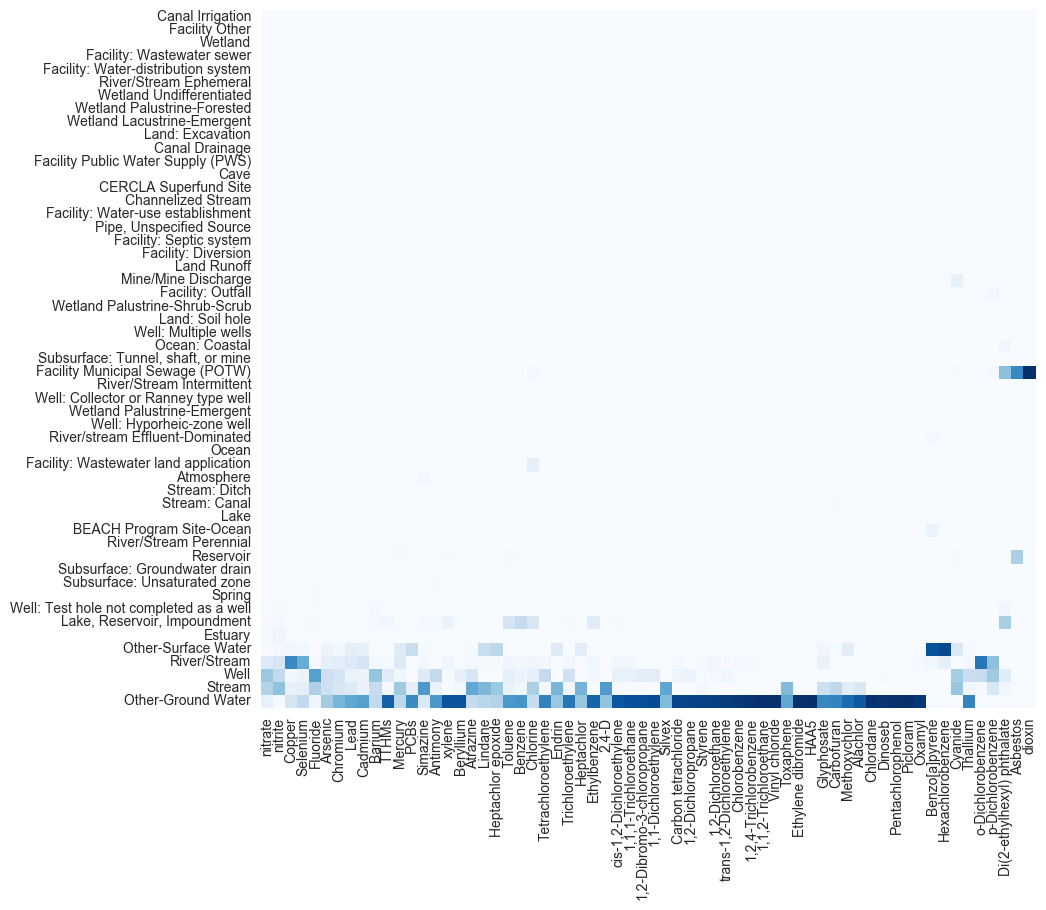

In [7]:
sums = xtab.sum(axis=0)
xtab_pct = xtab.div(sums, axis=1)

plt.figure(figsize=(10,9))
plt.pcolor(xtab_pct, cmap='Blues')
plt.ylim([0, len(xtab_pct.index)])
plt.xlim([0, len(xtab_pct.columns)])
yticks = plt.yticks(np.arange(0.5, len(xtab_pct.index), 1), xtab_pct.index)
xticks = plt.xticks(np.arange(0.5, len(xtab_pct.columns), 1), xtab_pct.columns, rotation='vertical')
plt.grid(b=True)

# Looking at just this decade

In [8]:
data2010s = data.loc[data.ActivityStartDate >= '2010-01-01']
xtab2010s = pd.crosstab(data2010s.MonitoringLocationTypeName, data2010s.MeasureGroup)

# ordering xtabs by frequencies
xtab2010s = xtab2010s[data2010s.MeasureGroup.value_counts().index]
xtab2010s = xtab2010s.reindex(data2010s.MonitoringLocationTypeName.value_counts().index)

### Distribution of location types

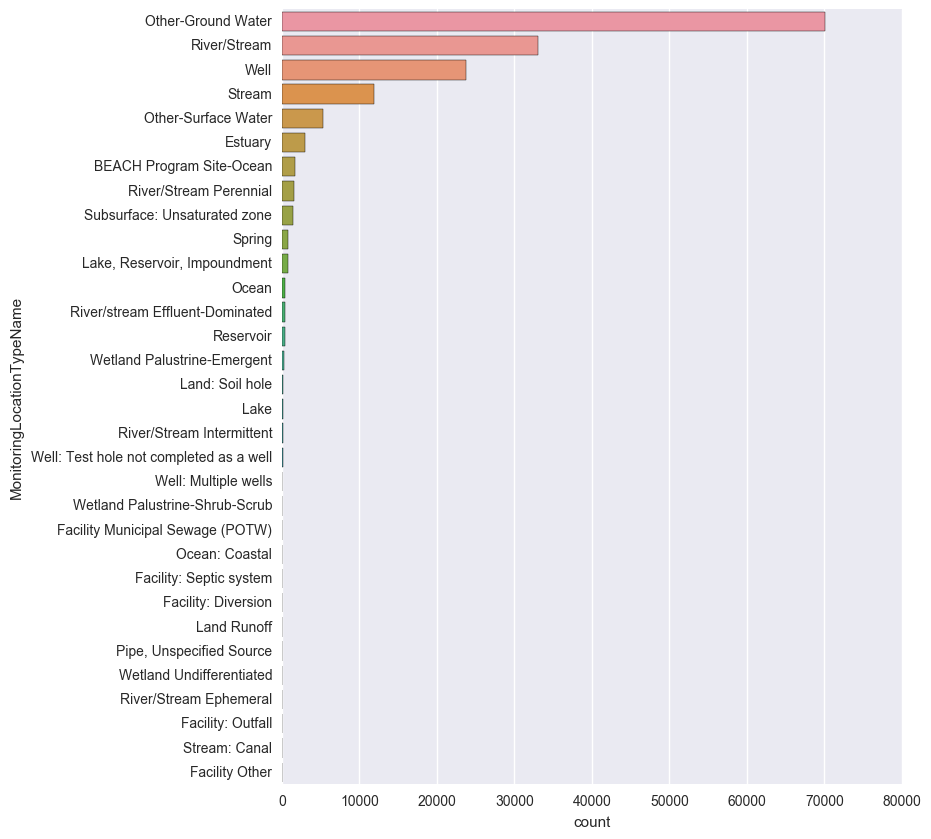

In [9]:
plt.figure(figsize=[8,10])
cp = sns.countplot(y=data2010s.MonitoringLocationTypeName,
                   order=data2010s.MonitoringLocationTypeName.value_counts().index)

### Distribution of pollution types

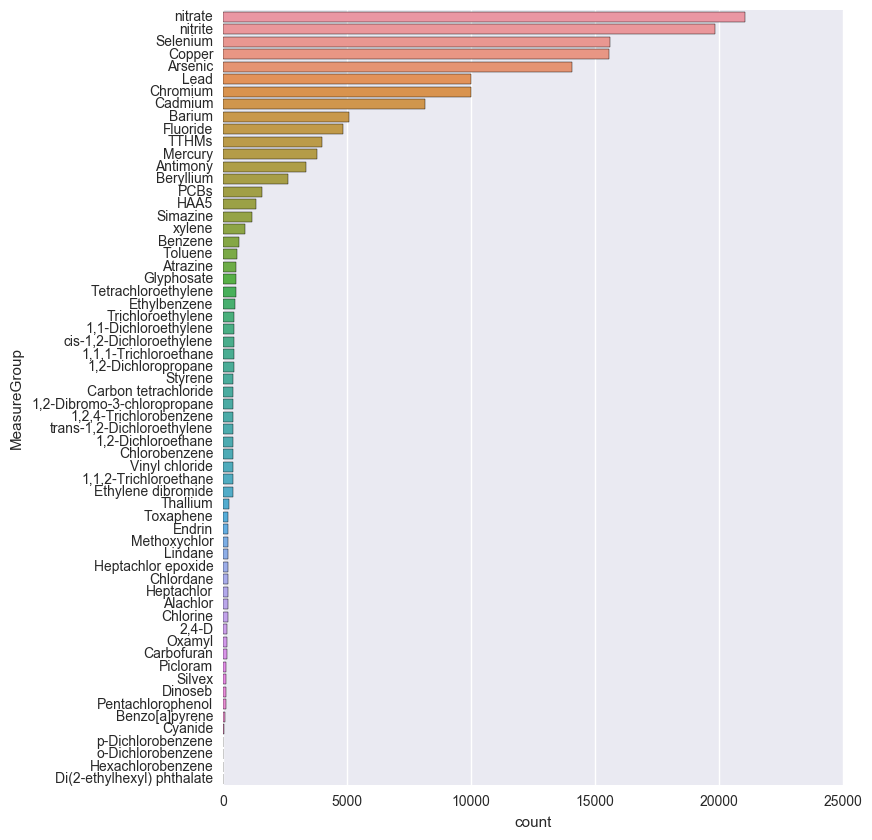

In [10]:
plt.figure(figsize=[8,10])
cp = sns.countplot(y=data2010s.MeasureGroup,
                  order=data2010s.MeasureGroup.value_counts().index)

## Overall heatmap (2010s)

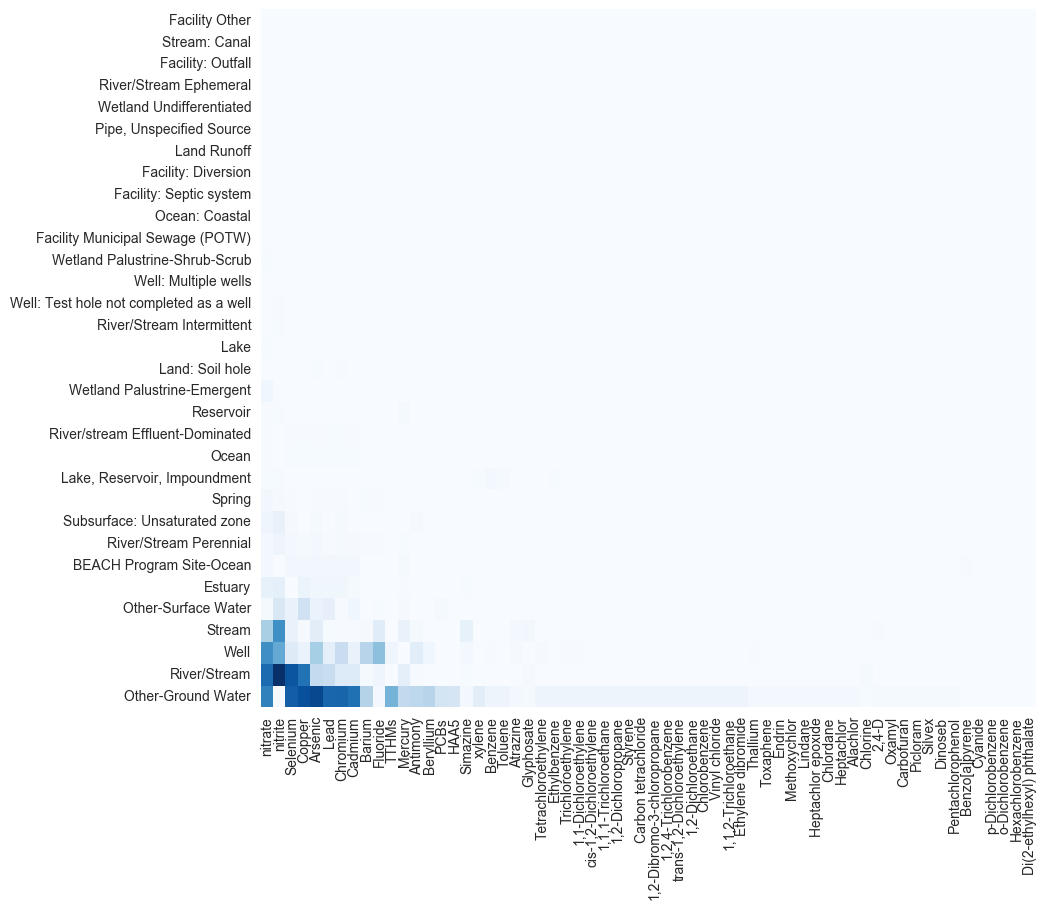

In [11]:
plt.figure(figsize=(10,9))
plt.pcolor(xtab2010s, cmap='Blues')
plt.grid(b=True)
plt.ylim([0, len(xtab2010s.index)])
plt.xlim([0, len(xtab2010s.columns)])
yticks = plt.yticks(np.arange(0.5, len(xtab2010s.index), 1), xtab2010s.index)
xticks = plt.xticks(np.arange(0.5, len(xtab2010s.columns), 1), xtab2010s.columns, rotation='vertical')

## Percentage of measurements by location type (2010s)
Within each row, the darkness of the squares indicate the relative proportion of measurements taken at that site.

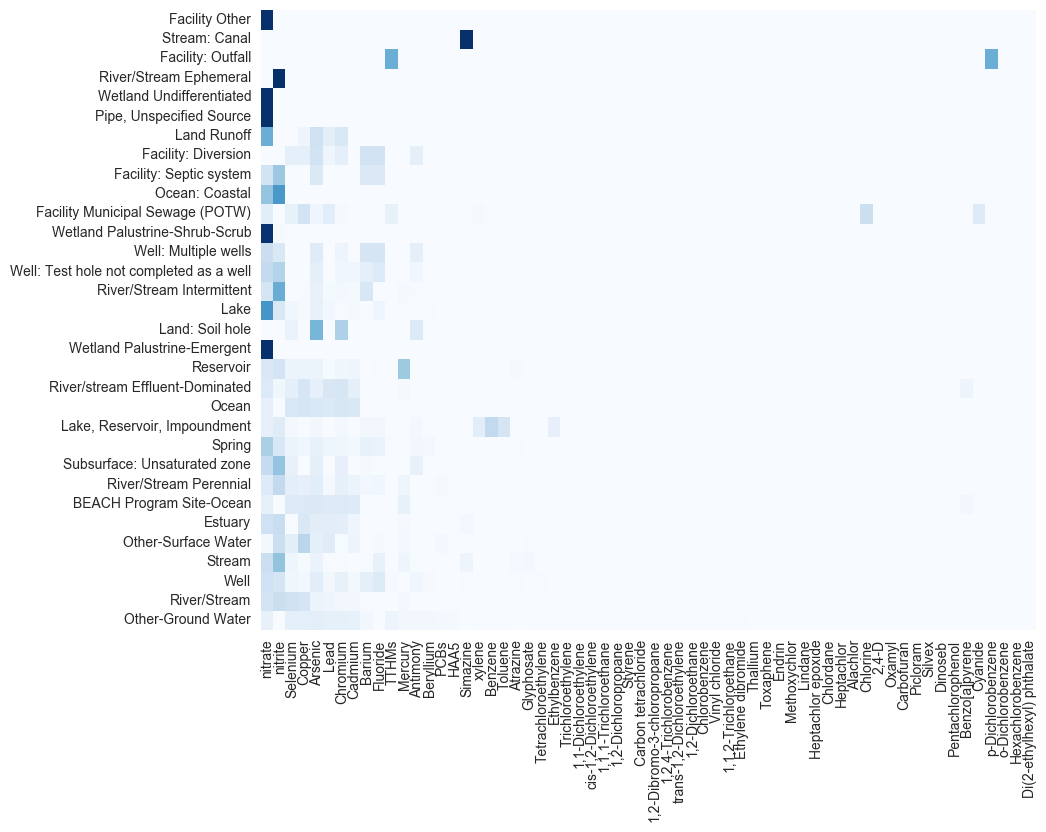

In [12]:
sums = xtab2010s.sum(axis=1)
xtab_pct = xtab2010s.div(sums, axis=0)

plt.figure(figsize=(10,8))
plt.pcolor(xtab_pct, cmap='Blues')
plt.grid(b=True)
plt.ylim([0, len(xtab_pct.index)])
plt.xlim([0, len(xtab_pct.columns)])
yticks = plt.yticks(np.arange(0.5, len(xtab_pct.index), 1), xtab_pct.index)
xticks = plt.xticks(np.arange(0.5, len(xtab_pct.columns), 1), xtab_pct.columns, rotation='vertical')

## Percentage of locations by measurement type (2010s)
Within each row, the darkness of the squares indicate the relative proportion of measurements taken at that site.

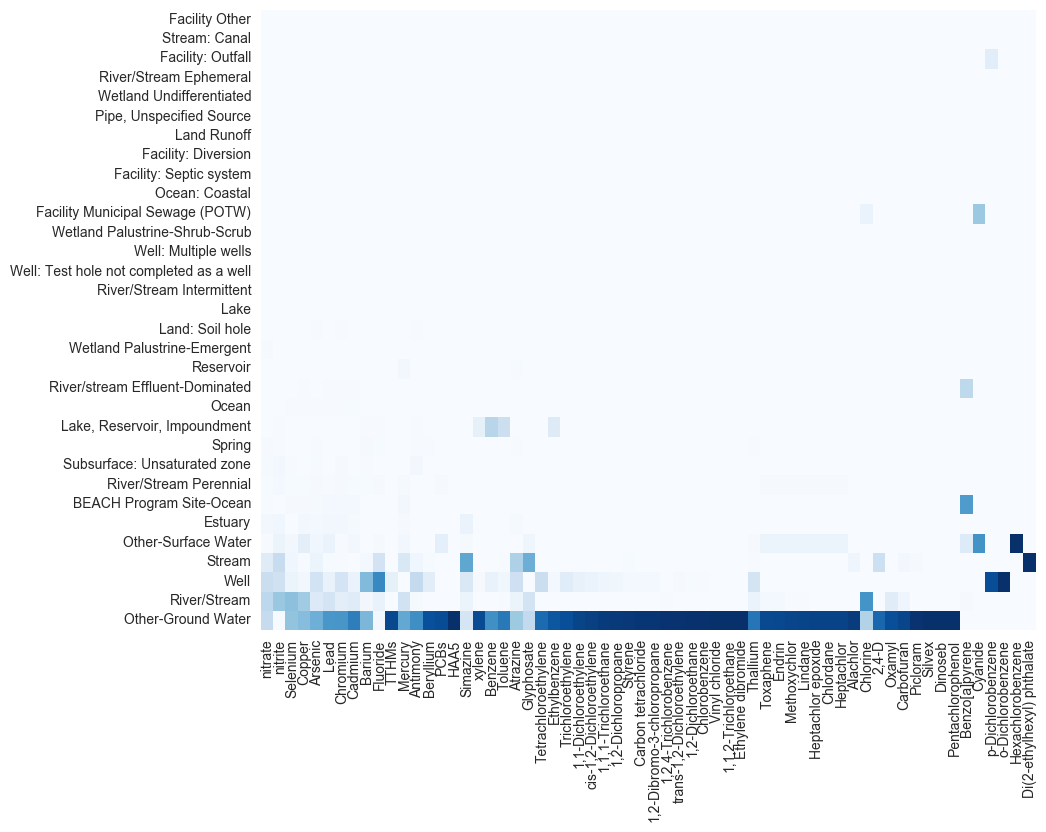

In [13]:
sums = xtab2010s.sum(axis=0)
xtab_pct = xtab2010s.div(sums, axis=1)

plt.figure(figsize=(10,8))
plt.pcolor(xtab_pct, cmap='Blues')
plt.grid(b=True)
plt.ylim([0, len(xtab_pct.index)])
plt.xlim([0, len(xtab_pct.columns)])
yticks = plt.yticks(np.arange(0.5, len(xtab_pct.index), 1), xtab_pct.index)
xticks = plt.xticks(np.arange(0.5, len(xtab_pct.columns), 1), xtab_pct.columns, rotation='vertical')

## Similarity of sites by measurement makeup
Using PCA

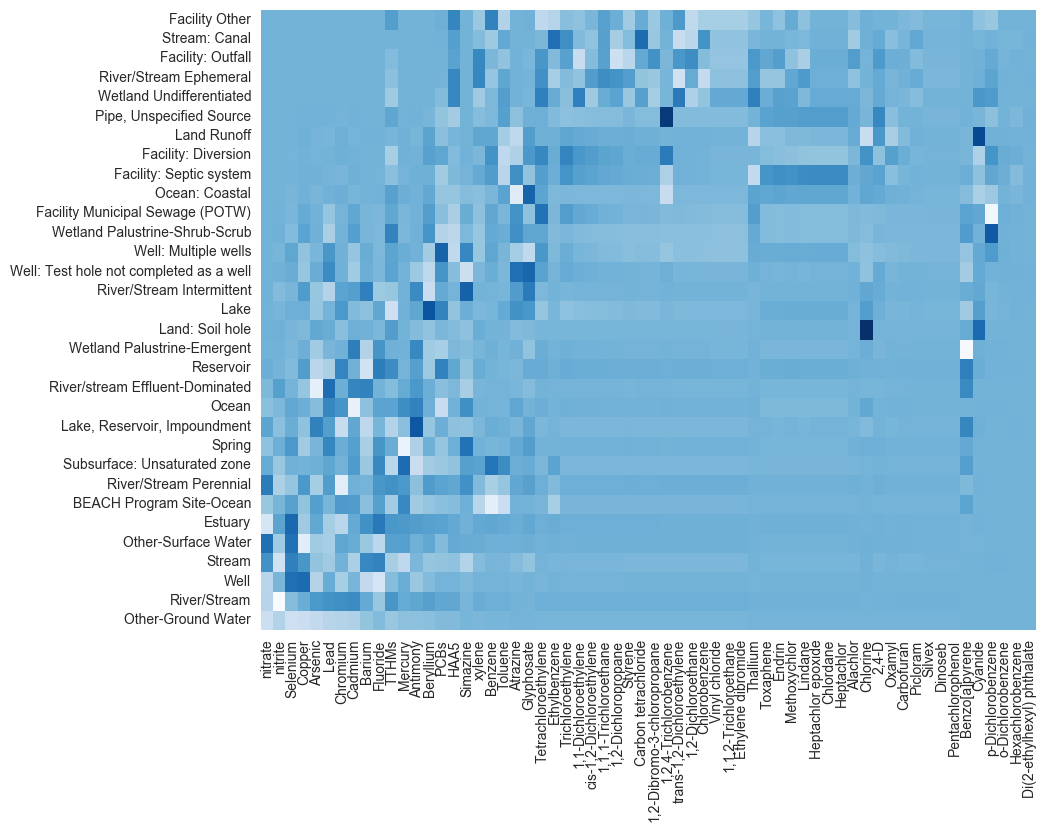

In [14]:
pca = PCA()
pca.fit(xtab2010s)
pc = pca.components_

plt.figure(figsize=(10,8))
plt.pcolor(pc, cmap='Blues')
plt.grid(b=True)
plt.ylim([0, len(xtab2010s.index)])
plt.xlim([0, len(xtab2010s.columns)])
yticks = plt.yticks(np.arange(0.5, len(xtab2010s.index), 1), xtab2010s.index)
xticks = plt.xticks(np.arange(0.5, len(xtab2010s.columns), 1), xtab2010s.columns, rotation='vertical')